In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.optimize as opt
from scipy.signal import savgol_filter

In [2]:
data_red = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/красный диод/калибровка красный.txt')
data_green1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/зеленый диод/калибровка.txt')
data_rainbow_norm = np.loadtxt("/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/белый диод.txt")
data_rainbow_green = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/белый калибровка2 без синего.txt')

In [3]:
def f(x,mu,sigma2,n):
    return n*np.exp(-(x-mu)**2/2/sigma2)

In [4]:
xdata = np.arange(0,data_green1.shape[0])

In [5]:
opt_red = opt.curve_fit(f,xdata,data_red[:,0],p0=[650,10,250])[0]
red_center = opt_red[0]
opt_green1 = opt.curve_fit(f,xdata,data_green1[:,1],p0=[250,10,250])[0]
green1_center = opt_green1[0]
l_step = (635.-532.)/(red_center-green1_center)
l_grid = (xdata-xdata[int(green1_center)])*l_step + np.ones_like(xdata)*532.

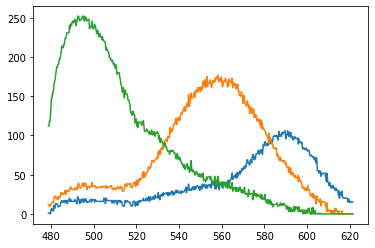

In [6]:
plt.plot(l_grid,data_rainbow_norm[:,:3])



In [7]:
normirovka = [2,3,5]
opt_empty0 = opt.curve_fit(f,xdata[400:],normirovka[0]*empty1[400:,0],p0=[475,1,100])[0]
opt_empty1 = opt.curve_fit(f,xdata,normirovka[1]*empty1[:,1],p0=[350,10,200])[0]
opt_empty2 = opt.curve_fit(f,xdata[:80],normirovka[2]*empty1[:80,2],p0=[59,10,250])[0]

NameError: name 'empty1' is not defined

In [9]:
#data_rainbow = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/пустая кювета.txt')#np.loadtxt("спектр диода.txt")
#blue_wid = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/кюветы бывают разные/голубая в ширину.txt')
#data_rainbow[:,2] = data_rainbow[:,2]-blue_cut#data_rainbow[:,2][200]
#data_rainbow[:,1] = data_rainbow[:,1]-red_cut#data_rainbow[:,1][100]
#data_rainbow[:,0] = data_rainbow[:,0]-green_cut#data_rainbow[:,0][400]
#blue_wid[:,2] = blue_wid[:,2]-blue_cut#blue_wid[:,2][250]
#blue_wid[:,1] = blue_wid[:,1]-blue_wid[:,1][100]
#blue_wid[:,0] = blue_wid[:,0]-blue_wid[:,0][400]
for i in range(3):
    data_rainbow[:,i][data_rainbow[:,i]<0]=0
  #  blue_wid[:,i][blue_wid[:,i]<0]=0
for i in range (3):
 #   plt.plot(blue_wid[:,i],label="{}".format(i))
    plt.plot(data_rainbow_norm[:,i]*normirovka[i],label="rain{}".format(i))
plt.plot(f(xdata,*opt_empty0),label="opt")
plt.plot(f(xdata,*opt_empty1),label="opt")
plt.plot(f(xdata,*opt_empty2),label="opt")
plt.legend()


NameError: name 'data_rainbow' is not defined

In [10]:
led_int = (np.sqrt(f(xdata,*opt_empty0))+np.sqrt(f(xdata,*opt_empty1))+np.sqrt(f(xdata,*opt_empty2)))**2
plt.plot(led_int)

NameError: name 'opt_empty0' is not defined

In [11]:
pink_wid1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/розовая в ширину.txt')
pink_len1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/розовая в длину.txt')
orange_len1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/рыжая в длину.txt')
orange_wid1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/рыжая в ширину.txt')
empty1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/пустая кювета.txt')
blue_wid1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/голубая в ширину.txt')
green_wid1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/зеленая в шиирину.txt')
green_len1 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы бывают разные/зеленая в длину.txt')

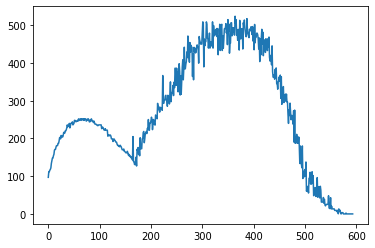

In [12]:
blue_cut = 0#50+0*np.max(empty[250:,2])
red_cut = 1*np.max(empty1[:100,1])#np.max(np.loadtxt('пустая кювет.txt')[:100,1])
green_cut = 2/3*red_cut#*np.max(empty[:350,0])
def intensity(arr):
    int_ar = np.zeros_like(l_grid)
    arr_add = arr.copy()
    arr_add[:,2] = arr_add[:,2]-blue_cut#np.mean(arr_add[350:,2])
    arr_add[:,1] = arr_add[:,1]-red_cut#np.max(arr_add[:130,1])#arr_add[:,1][100]
    arr_add[:,0] = arr_add[:,0]-green_cut#np.max(arr_add[:400,0])#arr_add[:,0][400]
    for i in range(3):
        arr_add[:,i][arr_add[:,i]<0]=0
        #print(np.min(arr_add))
    for i in range(3):
        int_ar = int_ar + np.sqrt(arr_add[:,i])
        #print(np.min(int_ar))
    return int_ar**2#savgol_filter(int_ar**2, 51, 2)
#w = savgol_filter(intensity(data_rainbow), 51, 2)
plt.plot(intensity(empty1))

Как говорили великие

In [13]:
data_red2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/красный диод/калибровка красный2.txt')
data_green2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/зеленый диод/калибровка2.txt')
data_rainbow_norm = np.loadtxt("/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/белый диод.txt")
data_rainbow_green = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/белый калибровка2 без синего.txt')

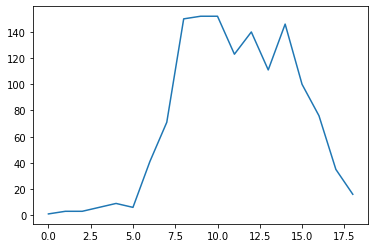

In [42]:
plt.plot(data_green2[245:264,1])
#plt.show()
#plt.plot(data_green2[:,1])
razr_sposobnost=(263-245)*l_step

In [15]:
data_crystall_white = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кристаллы 1белый без.txt')
data_crystall = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кристаллы 1белый с.txt') 
data_lamp = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/накалочка.txt')
data_na = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/натрий дуплет.txt')
data_hg = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/ртутная лампа.txt')

In [39]:
xdata = np.arange(0,data_green2.shape[0])
opt_red = opt.curve_fit(f,xdata,data_red2[:,0],p0=[650,10,250])[0]
red_center = opt_red[0]
opt_green = opt.curve_fit(f,xdata,data_green2[:,1],p0=[250,10,250])[0]
green1_center = opt_green[0]
l_step = (635.-532.)/(red_center-green1_center)
l_grid = (xdata-xdata[int(green1_center)])*l_step + np.ones_like(xdata)*532.

In [24]:
blue_filt = savgol_filter(blue_wid2, 21, 1)
green_len_filt = savgol_filter(green_len2, 21, 1)
green_wid_filt = savgol_filter(green_wid2, 21, 1)
empty_filt = savgol_filter(empty2, 21, 1)
pink_len_filt = savgol_filter(pink_len2, 21, 1)
pink_wid_filt = savgol_filter(pink_wid2, 21, 1)
orange_len_filt = savgol_filter(orange_len2, 21, 1)
orange_wid_filt = savgol_filter(orange_wid2, 21, 1)


In [18]:
blue_wid2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/голубая луна.txt')[:,1]
green_len2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/зеленая длина.txt')[:,1]
green_wid2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/зеленая широкая.txt')[:,1]
empty2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/пустая.txt')[:,1]
pink_len2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/розовая длина.txt')[:,1]
pink_wid2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/розовая ширина.txt')[:,1]
orange_wid2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/рыжая ширина.txt')[:,1]
orange_len2 = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/кюветы2/рыжая длина.txt')[:,1]

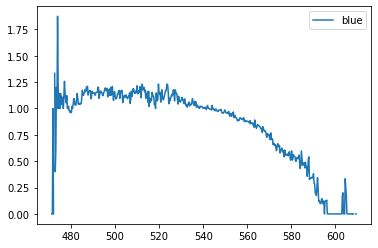

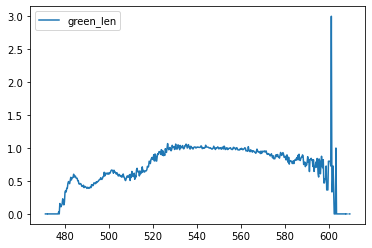

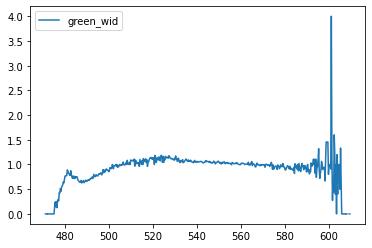

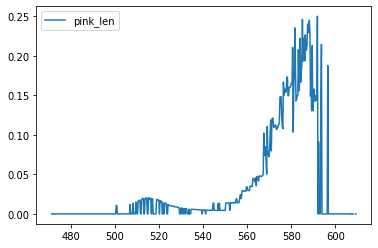

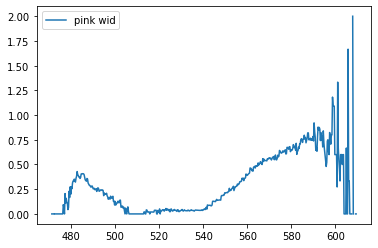

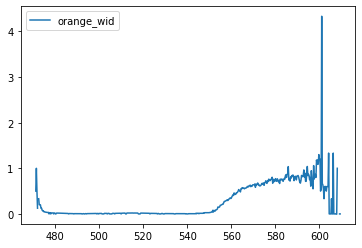

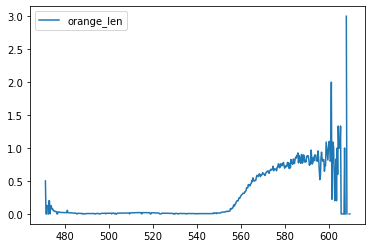

In [19]:
plt.plot(l_grid,blue_wid2/empty2,label="blue")
plt.legend()
plt.show()
plt.plot(l_grid,green_len2/empty2,label="green_len")
plt.legend()
plt.show()
plt.plot(l_grid,green_wid2/empty2,label="green_wid")
plt.legend()
plt.show()
plt.plot(l_grid,pink_len2/empty2,label="pink_len")
plt.legend()
plt.show()
plt.plot(l_grid,pink_wid2/empty2,label="pink wid")
plt.legend()
plt.show()
plt.plot(l_grid,orange_wid2/empty2,label="orange_wid")
plt.legend()
plt.show()
plt.plot(l_grid,orange_len2/empty2,label="orange_len")
plt.legend()
plt.show()

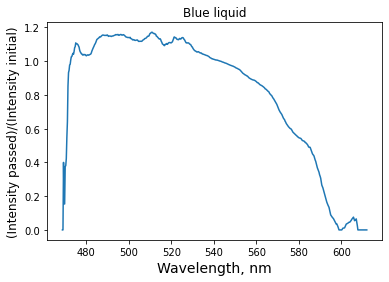

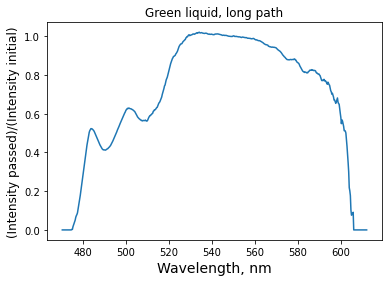

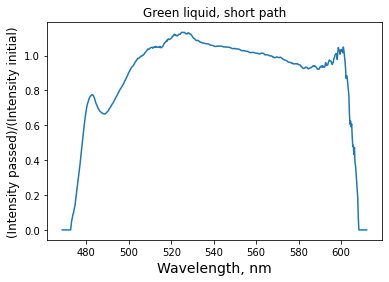

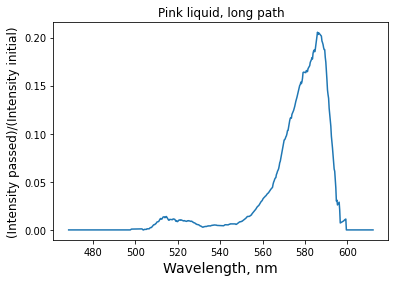

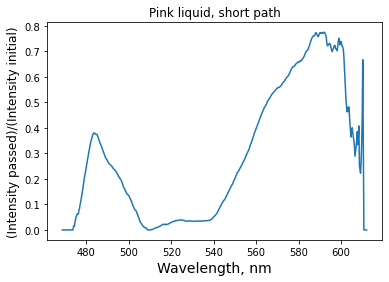

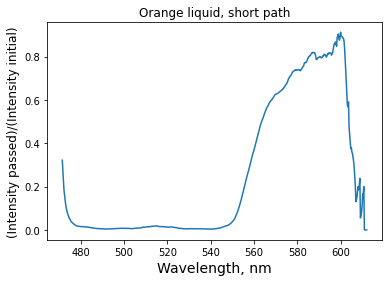

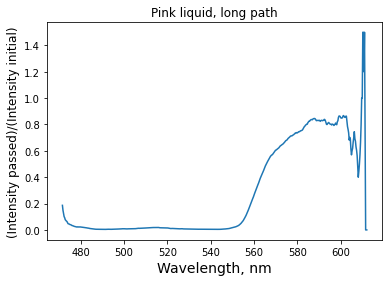

In [57]:
plt.plot(l_grid,blue_filt/empty_filt,label="blue")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Blue liquid")
#plt.legend()
plt.show()
plt.plot(l_grid[20:],green_len_filt[20:]/empty_filt[20:],label="green_len")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Green liquid, long path")
#plt.legend()
plt.show()
plt.plot(l_grid,green_wid_filt/empty_filt,label="green_wid")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Green liquid, short path")
#plt.legend()
plt.show()
plt.plot(l_grid,pink_len_filt/empty_filt,label="pink_len")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Pink liquid, long path")
#plt.legend()
plt.show()
plt.plot(l_grid,pink_wid_filt/empty_filt,label="pink wid")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Pink liquid, short path")
#plt.legend()
plt.show()
plt.plot(l_grid[25:],orange_wid_filt[25:]/empty_filt[25:],label="orange_wid")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Orange liquid, short path")
#plt.legend()
plt.show()
plt.plot(l_grid[25:],orange_len_filt[25:]/empty_filt[25:],label="orange_len")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('(Intensity passed)/(Intensity initial)',fontsize=12)
plt.title("Pink liquid, long path")
#plt.legend()
plt.show()

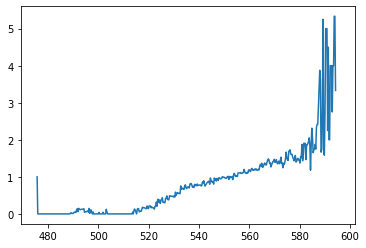

In [58]:
plt.plot(l_grid,data_crystall[:,1]/data_crystall_white[:,1])

In [ ]:
plt.plot(l_grid,data_crystall[:,3],label="With crystall")
plt.plot(l_grid,data_crystall_white[:,3],label="W/O crystall")
plt.legend()

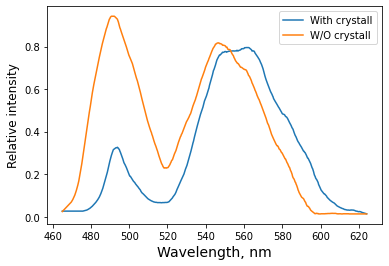

In [73]:
plt.plot(l_grid,savgol_filter(data_crystall[:,3]/np.max(data_crystall_white[:,3]),21,1),label="With crystall")
plt.plot(l_grid,savgol_filter(data_crystall_white[:,3]/np.max(data_crystall_white[:,3]),21,1),label="W/O crystall")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('Relative intensity',fontsize=12)
#plt.title("Intensity with and w")
plt.legend()

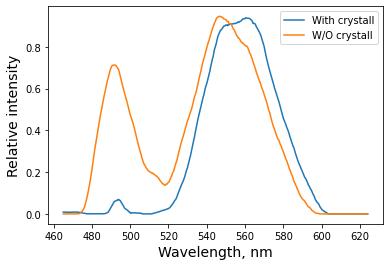

In [76]:
plt.plot(l_grid,savgol_filter(data_crystall[:,1]/np.max(data_crystall_white[:,1]),21,1),label="With crystall")
plt.plot(l_grid,savgol_filter(data_crystall_white[:,1]/np.max(data_crystall_white[:,1]),21,1),label="W/O crystall")
plt.xlabel('Wavelength, nm',fontsize=14)
plt.ylabel('Relative intensity',fontsize=14)
#plt.title("Intensity with and w")
plt.legend()

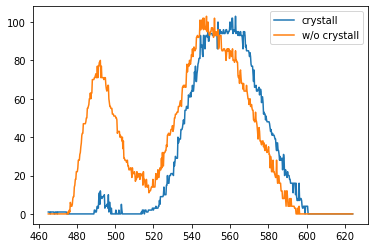

In [66]:
plt.plot(l_grid,data_crystall[:,1],label="crystall")
plt.plot(l_grid,data_crystall_white[:,1],label="w/o crystall")
plt.legend()

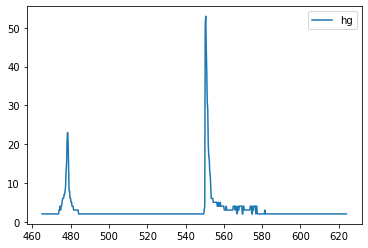

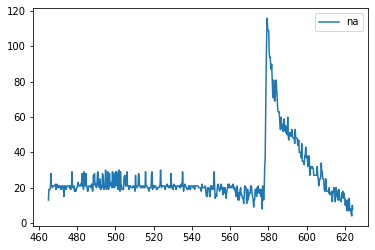

In [77]:
plt.plot(l_grid,data_hg[:,3],label='hg')
plt.legend()
plt.show()
plt.plot(l_grid,data_na[:,1],label='na')
plt.legend()
plt.show()

In [78]:
data_black_body = np.loadtxt('/Users/arpolkin/HSE/лабы/ласт трай/mat-/артем и его друзья2/накалочка.txt')

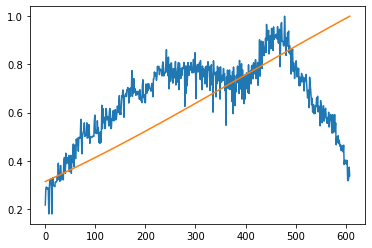

In [92]:
asd = np.zeros_like(l_grid)
for i in range (0,3):
    asd = asd + np.sqrt(data_black_body[:,i])
plt.plot(asd**2/np.max(asd**2))
plt.plot(norm_pl(l_grid,3000))

In [83]:
h = 6.62*10**(-34)
kb = 1.38*10**(-23)
c = 3*10**8
def planck(l,t):
    return 2*h*c**2/l**5/(np.exp(h*c/(l*kb*t))-1)

In [91]:
def norm_pl(l,t):
    return planck(l*10**(-9),t)/np.max(planck(l*10**(-9),t))

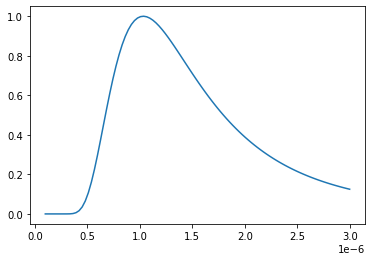

In [113]:
plt.plot(np.linspace(10**(-7),3*10**(-6),100),norm_pl(np.linspace(0.1,3*10**3,100),3000))

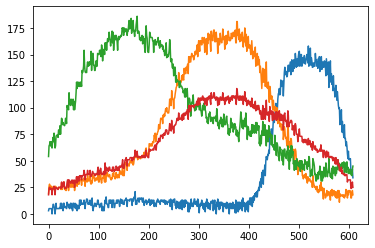

In [114]:
plt.plot(data_black_body)